# House price evolution model for Limerick (Ireland)

## Introduction

House pricing has raised in the recent years in Ireland. Buying a house is one of the main lifelong investments families will face off. There are several Real Estate blogs that are giving their forecast opinion through blogs.

This model aims to give answers to this question by runing a model based in different variables explained below.

## Methodology

### Datasets / variables

6 different variables have been chosen to feed the model. all the data comes in from CSO (Central Statistics Office) and look as follows:

All datasets have associated the following information

In [2]:
#import pandas and read datasets
import pandas as pd
path = (r'EDA57.20201230T121257.csv')
nsf = pd.read_csv (path)
print('Number of schools: ',nsf.keys())
path = (r'EP007.20201230T121226.csv')
hsf = pd.read_csv (path)
print('Housing stock and vacant dwellings: ', hsf.keys())
path = (r'HPA02.20201230T191226.csv')
dpf = pd.read_csv (path)
print('Dwelling property status',dpf.keys())
path = (r'IIA01.20201230T121251.csv')
inf = pd.read_csv (path)
print('income information: ',inf.keys())
path = (r'MUM01.20201230T121228.csv')
uf = pd.read_csv (path)
print('Unemployement',uf.keys())

Number of schools:  Index(['Statistic', 'Year', 'County', 'School Programme', 'UNIT', 'VALUE'], dtype='object')
Housing stock and vacant dwellings:  Index(['Statistic', 'CensusYear', 'Province County or City', 'UNIT', 'VALUE'], dtype='object')
Dwelling property status Index(['Statistic', 'Year', 'County', 'Dwelling Status', 'Stamp Duty Event',
       'Type of Buyer', 'Type of Sale', 'UNIT', 'VALUE'],
      dtype='object')
income information:  Index(['Statistic', 'Year', 'Electoral Division', 'UNIT', 'VALUE'], dtype='object')
Unemployement Index(['Statistic', 'Month', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')


In order to explore each of those and how it looks the information, it has been broken down each one in order to study their values and its distribution.

#### Dataset 1: Number of Schools

Visualization, clean up and select the values interested for our model is required as first instance beforehand.

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
# reindex the columns just to avoid spaces in the header names
p = nsf.reindex(columns=['Statistic', 'Year', 'County', 'School Programme', 'UNIT', 'VALUE'])
# dataframe just selecting information wanted to select
df1 = p[['Statistic','Year','County','VALUE']]
df1 = df1.loc[df1['Statistic'].str.startswith('Cla')]
print(df1)

                        Statistic  Year        County    VALUE
3744  Classes in National Schools  1995  All Counties  18535.0
3745  Classes in National Schools  1995  All Counties  17409.0
3746  Classes in National Schools  1995  All Counties    367.0
3747  Classes in National Schools  1995  All Counties    759.0
3748  Classes in National Schools  1995        Carlow    237.0
...                           ...   ...           ...      ...
7483  Classes in National Schools  2020       Donegal     28.0
7484  Classes in National Schools  2020      Monaghan    340.0
7485  Classes in National Schools  2020      Monaghan    321.0
7486  Classes in National Schools  2020      Monaghan     19.0
7487  Classes in National Schools  2020      Monaghan      0.0

[3744 rows x 4 columns]


Sum the values per year and county:

In [4]:
import numpy as np
## select just Limerick numbers (Limerick, Limerick city and Limerick county)
select_Limerick = df1.loc[df1['County'].str.startswith('Lim')]
## group by Year and sum value
schools_Limerick=select_Limerick.groupby('Year', as_index=False).agg({"VALUE": "sum"})
## reindex = schools_Limerick.reindex(columns=['Year', 'VALUE'])
## print(reindex)


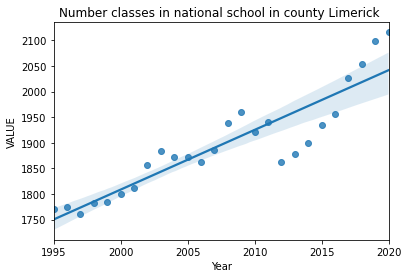

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.regplot(x="Year", y="VALUE", data=schools_Limerick).set_title('Number classes in national school in county Limerick ');


#### Housing stock

In [6]:
# reindex the columns just to avoid spaces in the header names

p = hsf.reindex(columns=['Statistic', 'CensusYear', 'Province County or City', 'UNIT', 'VALUE'])

# dataframe just selecting information wanted to select
df1 = p[['Statistic','CensusYear','Province County or City','VALUE']]
df2 = df1.loc[df1['Statistic'].str.startswith('Housing')] ## Total housing stock


In [7]:
# Select just County Limerick stock housing
select_Limerick = df2.loc[df2['Province County or City'].str.startswith('Lim')]

In [8]:
print(select_Limerick)

                Statistic  CensusYear Province County or City    VALUE
24   Housing Stock - 2011        2016                Limerick  82553.0
25   Housing Stock - 2011        2016           Limerick City  26808.0
26   Housing Stock - 2011        2016         Limerick County  55745.0
244   Housing Stock -2016        2016                Limerick  82741.0
245   Housing Stock -2016        2016           Limerick City  26480.0
246   Housing Stock -2016        2016         Limerick County  56261.0


In [9]:
Select_2011 = select_Limerick.loc[select_Limerick['Statistic']=='Housing Stock - 2011']
Select_2016 = select_Limerick.loc[select_Limerick['Statistic']=='Housing Stock -2016']

lim_2011_sum = Select_2011['VALUE'].sum()
lim_2016_sum = Select_2016['VALUE'].sum()

#Variation stock in Limerick

dif_stock= lim_2016_sum - lim_2011_sum
print('stock Variation in County Limerick between 2016 and 2011: ',dif_stock)

stock Variation in County Limerick between 2016 and 2011:  376.0


#### Income information

In [19]:
#Information about household median gross income per year in county Limerick (CSO)
inf = inf.reindex(columns=['Statistic', 'Year', 'Electoral Division', 'UNIT', 'VALUE'])
df2 = inf.loc[inf['Electoral Division'].str.contains('Limerick')] ## Total housing stock in Limerick county

income_Limerick=df2.groupby('Year', as_index=False).agg({"VALUE": "mean"}) # group by year and mean value
print(income_Limerick) ## mean of average gross income in County Limerick
print(max(df2['VALUE']))
print(min(df2['VALUE']))

### Create a database assuming 
## ref (https://www.limerick.ie/sites/default/files/media/documents/2018-07/Economic%20Profiling%20Report%20for%20Limerick%20City%20and%20County.pdf)
## 2011 - 2014 falling 5.4%

   Year         VALUE
0  2016  43639.373563
72946
15687


#### Population growth

In [23]:
PopGrowth = pd.DataFrame(columns=["year", "Inhabitants"], data=[[1996,165042],[2002,175304],[2006,184055],[2011,191809],[2016,194899]]) ## CSO and https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth
print(PopGrowth)

   year  Inhabitants
0  1996       165042
1  2002       175304
2  2006       184055
3  2011       191809
4  2016       194899


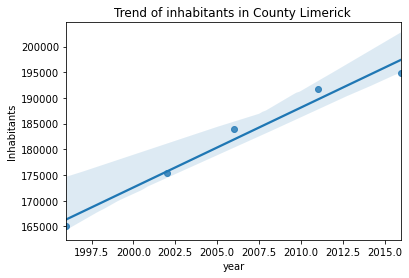

In [24]:
sns.regplot(x="year", y="Inhabitants", data=PopGrowth).set_title('Trend of inhabitants in County Limerick ');

#### Unemployement

In [25]:
## Unemployement in Limerick source CSO and https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%202018.
unempl = pd.DataFrame(columns=["year", "Unemployement rate"], data=[[2012,15.8],[2013,14.4],[2014,12.7],[2015,10.5],[2016,8.8],[2017,7.1],[2018,5.2]])


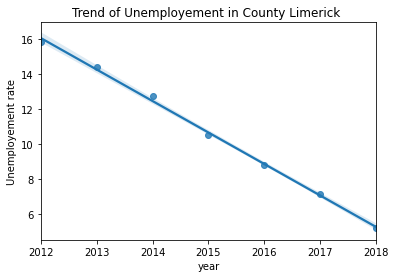

In [26]:
sns.regplot(x="year", y="Unemployement rate", data=unempl).set_title('Trend of Unemployement in County Limerick ');

#### Investment per year

In [27]:
## Investment per year https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%20
invest = pd.DataFrame(columns=["year", "Investment"], data=[[2013,596.0],[2014,80],[2015,569.6],[2016,84.5],[2017,353.7],[2018,346.6]])

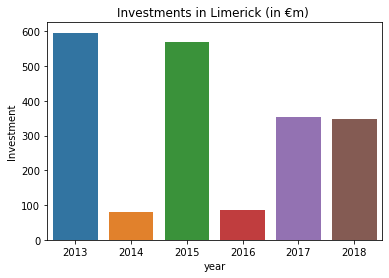

In [43]:
sns.barplot(x="year", y="Investment", data=invest).set_title('Investments in Limerick (in €m) ');

#### New jobs

In [44]:
njobs = pd.DataFrame(columns=["year", "New Jobs"], data=[[2013,2614],[2014,1300],[2015,3523],[2016,1957],[2017,3326],[2018,1651]])

   year  New Jobs
0  2013      2614
1  2014      1300
2  2015      3523
3  2016      1957
4  2017      3326
5  2018      1651


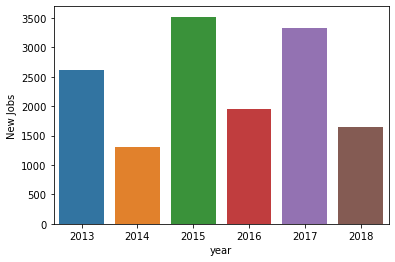

In [45]:
print(njobs)

sns.barplot(x="year", y="New Jobs", data=njobs)

#### Housing Price 

In [47]:
meanprice = pd.DataFrame(columns=["year", "House price"], data=[[2014,215748],[2015,235717],[2016,228740]])
#### https://www.ceicdata.com/en/ireland/ehlg-average-property-price/average-property-price-new-limerick
### new housing

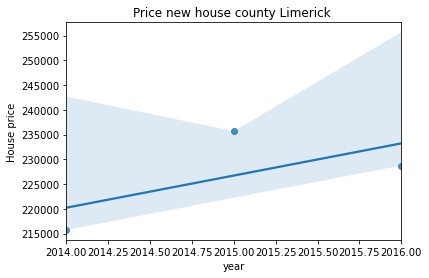

In [48]:
sns.regplot(x="year", y="House price", data=meanprice).set_title('Price new house county Limerick ');